In [ ]:
import torch
import torchtext.vocab as vocab
from torchtext.vocab import Vectors

In [ ]:
glove=vocab.GloVe(name='6B',dim=100)

In [ ]:
glove_dim = 100

In [ ]:
glove.vectors.shape

torch.Size([400000, 100])

In [ ]:
def get_emb_vec(word):
  word_index=glove.stoi[word]
  emd=glove.vectors[word_index]
  return emd

In [ ]:
get_emb_vec('pant').shape

torch.Size([100])

In [ ]:
get_emb_vec('pant')

tensor([-0.2037, -0.4579, -0.7909, -0.3249, -1.0616, -0.3221, -0.0256,  0.6231,
        -0.4412,  0.5205,  0.2402,  0.5966,  0.5319,  0.2128,  0.2767, -0.2163,
        -0.2600,  0.0632,  0.9735, -1.0328,  0.5010, -0.0935,  0.4891, -0.1199,
         0.6821,  1.0552, -0.7183, -0.6692, -0.0679, -0.5195,  0.0729, -0.1439,
        -0.1604, -0.5851, -0.3173,  0.9247, -0.3100,  0.4797,  0.0933,  0.1928,
        -0.2346,  0.0424, -0.7275, -0.2601, -0.4726,  0.1621,  0.5307,  1.1041,
         0.0379,  0.5818, -0.4243, -0.0292, -0.0625,  0.0847, -0.2028,  0.3591,
        -0.3158,  0.3441, -0.3783,  0.0995,  0.3625, -0.0178, -0.0779,  0.8154,
         0.1624,  0.3241, -0.0088,  0.2909,  0.3102,  0.1153,  0.8080,  0.2540,
         0.3751, -0.6306,  0.3669,  0.4791, -1.1962, -0.3397,  0.3490, -0.4882,
        -0.0829, -0.4045,  0.4196, -1.0888, -0.2693,  0.4880, -0.4125,  0.3307,
         0.2324,  0.1535,  0.3934, -0.5723,  0.4360, -0.0457,  0.6561,  0.5987,
        -0.0936, -0.2289,  0.5741,  0.03

In [ ]:
def get_close_words(word,max_n=5):
  word_emb=get_emb_vec(word)
  distance = [ (w,torch.dist(word_emb,get_emb_vec(w)).cpu().item()) for w in glove.itos]
  dist_sort_filt=sorted(distance,key= lambda x:x[1])[:max_n]
  return dist_sort_filt

In [ ]:
get_close_words('car')

[('car', 0.0),
 ('vehicle', 3.2313716411590576),
 ('truck', 3.2801129817962646),
 ('cars', 3.5951931476593018),
 ('driver', 3.7215418815612793)]

In [ ]:
# class newGloVe(Vectors):
#     url = {
#         "42B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.42B.300d.zip",
#         "840B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.840B.300d.zip",
#         "twitter.27B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip",
#         "6B": "https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip",
#     }
#     def __init__(self, name="840B", dim=300, **kwargs) -> None:
#         url = self.url[name]
#         print(f"Downloading from {url}")
#         name = "glove.{}.{}d.txt".format(name, str(dim))
#         super(newGloVe, self).__init__(name, url=url, **kwargs)

# glove = newGloVe(name='6B', dim=100)

In [ ]:
words = []
categories = ['numbers', 'algebra', 'music', 'science', 'technology']

In [ ]:
import pandas as pd

In [ ]:
df_word_cloud = pd.DataFrame({
    'category': [],
    'word': []
})

In [ ]:
for category in categories:
  print(category)
  closest_words = get_close_words(word=category, max_n=20)
  temp = pd.DataFrame({
        'category': [category] * len(closest_words),
        'word': closest_words
    })
  df_word_cloud = pd.concat([df_word_cloud, temp], ignore_index=True)

numbers
algebra
music
science
technology


In [ ]:
df_word_cloud

,category,word
0,numbers,"(numbers, 0.0)"
1,numbers,"(number, 3.4887592792510986)"
2,numbers,"(though, 4.128623962402344)"
3,numbers,"(instance, 4.160089492797852)"
4,numbers,"(fact, 4.180027484893799)"
...,...,...
95,technology,"(applications, 4.896607398986816)"
96,technology,"(innovations, 4.897731781005859)"
97,technology,"(developing, 4.898324012756348)"
98,technology,"(research, 4.9329142570495605)"


In [ ]:
n_rows = df_word_cloud.shape[0]
n_cols = glove_dim
X = torch.empty((n_rows, n_cols))
for i in range(n_rows):
    current_word = df_word_cloud.loc[i, 'word']
    X[i, :] = get_emb_vec(current_word[0])
    print(f"{i}: {current_word}")

In [ ]:
df_word_cloud.loc[2, 'word'][0]

'though'

In [ ]:
from plotnine import ggplot, aes, geom_text, labs
from sklearn.manifold import TSNE

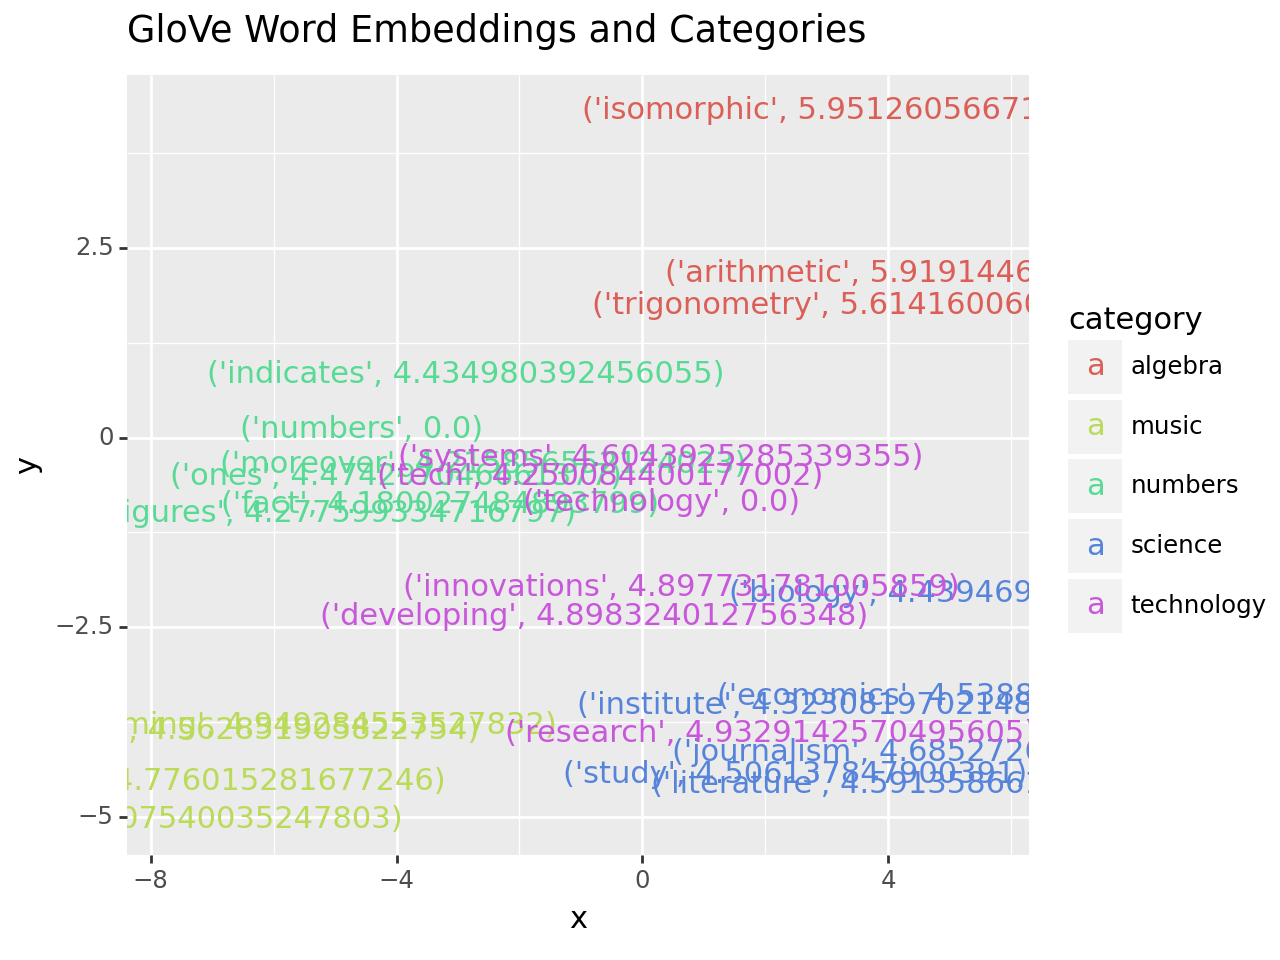

<Figure Size: (640 x 480)>

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.cpu().numpy())
# %%
df_word_cloud['x'] = X_tsne[:, 0]
df_word_cloud['y'] = X_tsne[:, 1]

ggplot(data=df_word_cloud.sample(25)) + aes(x = 'x', y='y', label = 'word', color = 'category') + geom_text() + labs(title='GloVe Word Embeddings and Categories')